# Deep Learning – Exercise 1

## Image Classification with fastai

---

## 1. Problem Definition

### Task Description

The goal of this project is to build an image classification system that can identify different types of coffee drinks from images.

### Classes

The model classifies images into the following categories:

* Espresso
* Cappuccino
* Americano

### Motivation

Automatically recognizing coffee drinks from images can be useful for:

* Smart café ordering systems
* Menu digitization
* Food recognition mobile applications

### Expected Challenges

* High visual similarity between coffee drinks
* Variations in lighting, cups, and angles
* Small dataset size

---




## 2. Dataset Creation and Preparation

### Dataset Source

The dataset is stored on Google Drive and downloaded automatically using `gdown`.

### Dataset Structure

```
data/
├── train/
│   ├── Espresso/
│   ├── Cappuccino/
│   └── Americano/
├── valid/
│   ├── Espresso/
│   ├── Cappuccino/
│   └── Americano/
```

Each class contains over 100 images. The data is split into approximately 80% training and 20% validation.

### Data Cleaning

Images were manually reviewed to remove corrupted or irrelevant samples.



# 3. Setup and Imports

In [3]:
from fastai.vision.all import *

# 4. Dataset Download

In [4]:
!pip install gdown -q


FILE_ID = "1joh50_nowTkFj2q6lfEC3TOF6i_ia1h7"
!gdown --id {FILE_ID} -O data.zip -q
!unzip -qo data.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


# 5. Data Loading with fastai

In [5]:
path = Path('data')


dls = ImageDataLoaders.from_folder(
path,
train='train',
valid='valid',
item_tfms=Resize(224),
batch_tfms=aug_transforms(mult=1.0)
)


print(dls.c)
print(dls.vocab)

3
['Americano', 'Cappuccino', 'Espresso']


## Example Training Batch

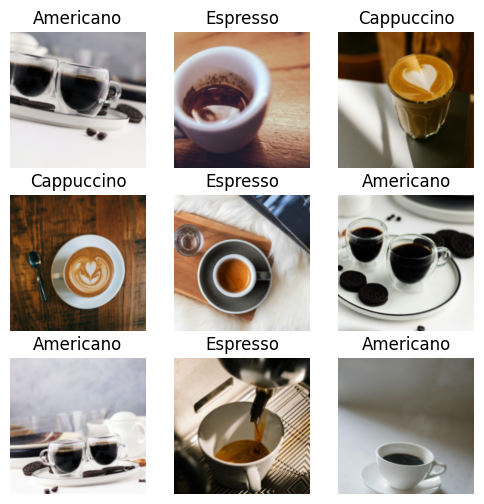

In [6]:
dls.show_batch(max_n=9, figsize=(6,6))

# 6. Model Training

## Initial Training , Fine-Tuning and Training Curves

epoch,train_loss,valid_loss,error_rate,time
0,1.765906,0.783848,0.277778,01:54
1,1.194610,0.452044,0.166667,01:53
2,0.954201,0.302812,0.111111,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.540086,0.255457,0.122222,01:54
1,0.522787,0.170015,0.066667,01:49
2,0.442523,0.125383,0.033333,01:51
3,0.396800,0.118841,0.033333,01:54
4,0.355982,0.121064,0.044444,02:04


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

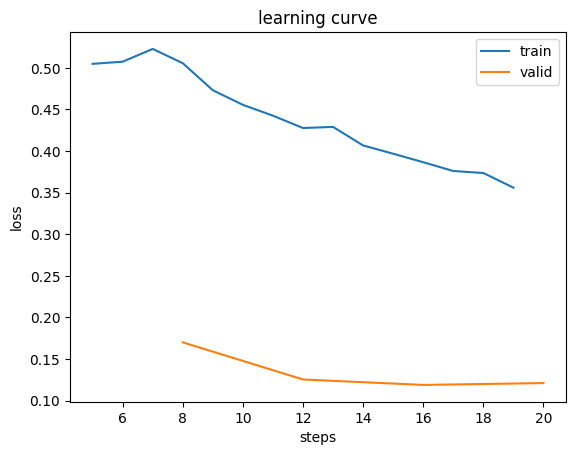

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

#print("Finding optimal learning rate...")
#learn.lr_find()

lr=3e-3
learn.fit_one_cycle(3,lr)

learn.unfreeze()
learn.fit_one_cycle(5,lr_max=slice(1e-6, 1e-3))
learn.recorder.plot_loss()

# 7. Evaluation
## Quantitative Results

In [8]:
loss, error_rate = learn.validate()
print(f"Validation loss: {loss}")
print(f"Error rate: {error_rate}")

Validation loss: 0.12106390297412872
Error rate: 0.04444442689418793


## Confusion Matrix

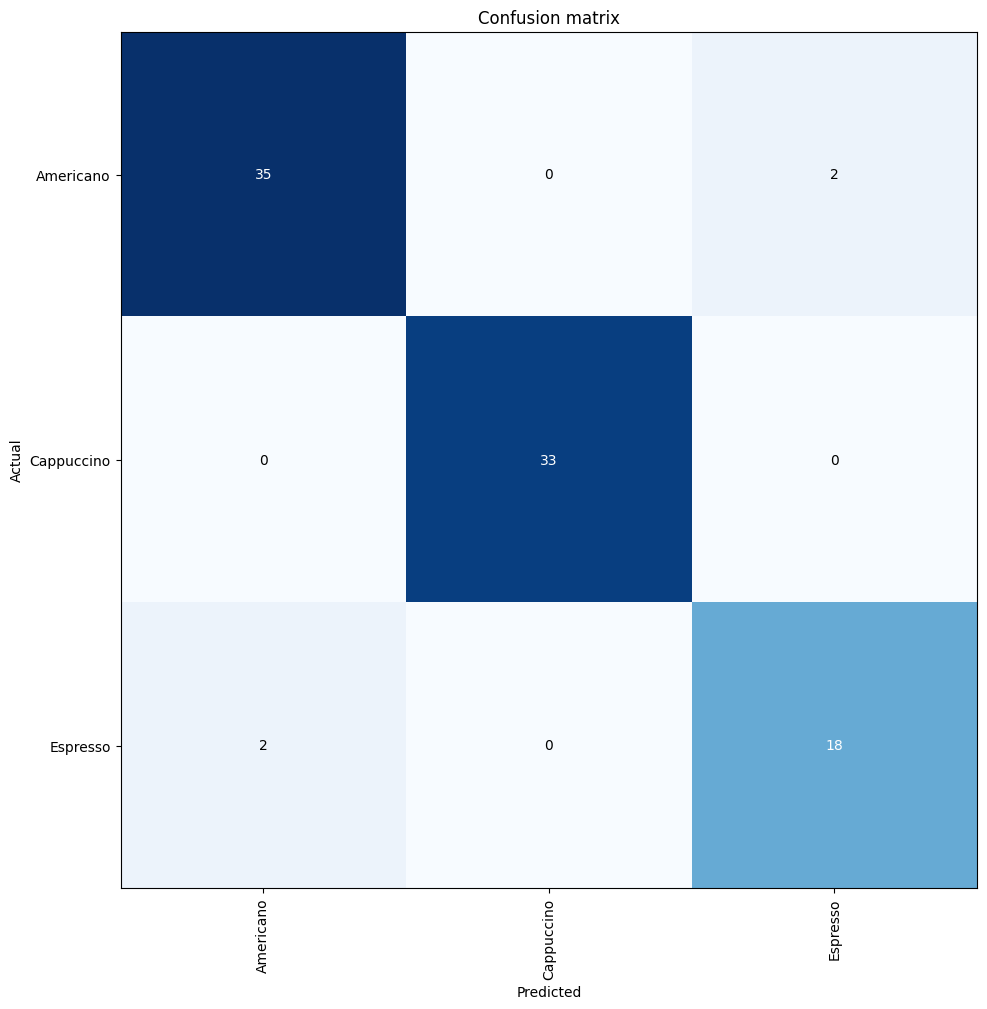

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

## Top Losses

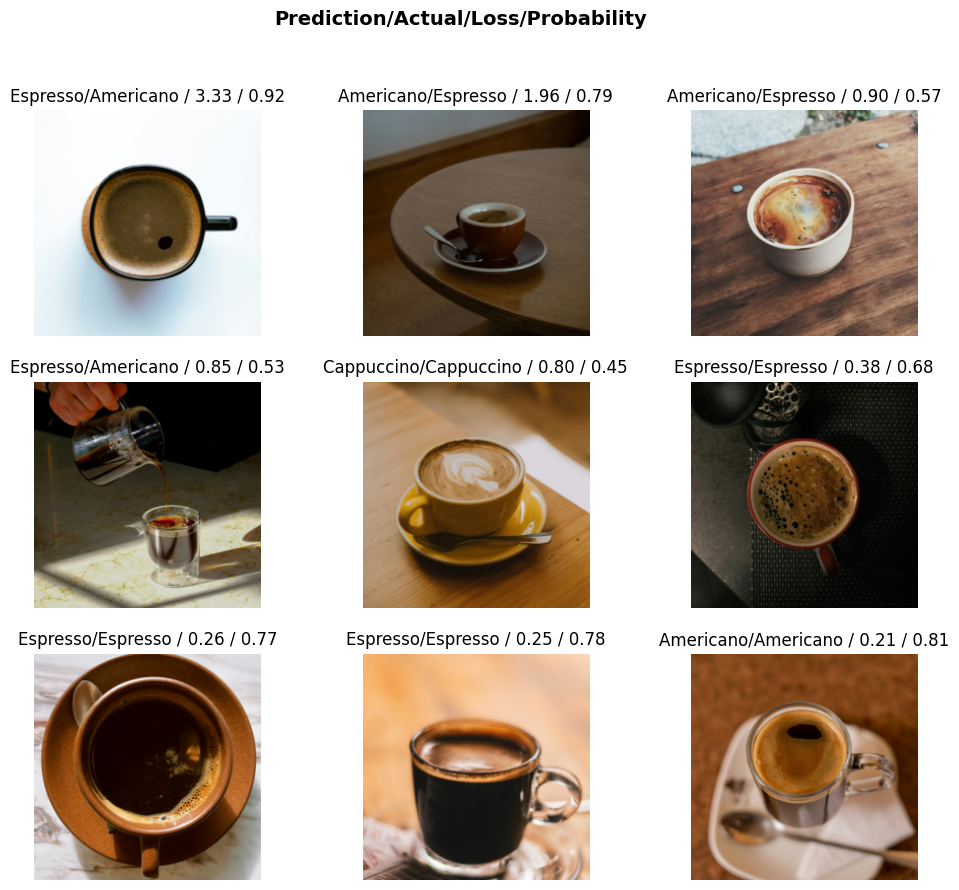

In [10]:
interp.plot_top_losses(9, figsize=(12,10))

# 4. Discussion of Model Weaknesses
* Slight Overfitting: The Learning Curve shows that the Train Loss continues to drop while the Valid Loss flattens out, indicating the onset of slight overfitting. I should have stopped the training earlier to better maximize generalization.

* Specific Weakness: The model is highly accurate overall but has a specific limitation in distinguishing between Americano and Espresso. Future improvements will require targeted data augmentation for these two classes and the implementation of Early Stopping to manage the overfitting.